<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *AIB / SECTION 4 / SPRINT 3 / NOTE 1*

---

# N431. 합성곱 신경망(Convolutional Neural Network)과 전이 학습(Transfer Learning)

## 컴퓨터 비전(Computer Vision)

## CNN(Convolutional Neural Network, 합성곱 신경망)과 CNN의 구조

이번 시간에는 **컴퓨터 비전(Computer Vision)**에서 자주 사용되는 **<font color="ff6f61">합성곱 신경망(Convolutional Neural Network, CNN)</font>**을 알아보도록 하겠습니다.

합성곱 신경망(CNN)이 이미지 분류에서 주목받은 시기는 2012년인데요.<br/>
매년 열리는 이미지넷(ImageNet) 데이터셋 분류 경진대회인 ILSVRC 에서 2012년에 우승한 AlexNet 덕분이었습니다.

합성곱 신경망이 이미지 분류에서 주목받게 된 이유는 무엇일까요?

이미지는 위치에 맞는 **공간적인 특성**을 가지고 있습니다.<br/>
하지만 여러분이 Sprint 1 에서 구축해보셨던 다층 퍼셉트론 신경망(MLP)은<br/>
**모든 입력 값을 `Flatten`으로 펴준 뒤에 연산**하기 때문에 이런 공간적 특성을 잘 살려내지 못합니다.

MNIST 데이터 처럼 간단한 이미지 데이터는 MLP로도 분류가 가능하지만<br/>
패턴이 복잡한 컬러 이미지를 이런 방식으로 분류하는 것은 쉽지 않은데요.<br/>

반면 합성곱 신경망은 학습 과정에서 이런 공간적 특성을 보존하며 학습할 수 있습니다.<br/>
합성곱 층은 이미지의 일부분을 훑으면서 연산이 진행되며 특징을 잡아내어 학습하기 때문에<br/>
층이 깊어지더라도 공간적 특성을 최대한 보존할 수 있습니다.




### CNN의 구조

기본적인 CNN의 구조는 아래 그림과 같이 특징 추출 부분(1), 분류를 위한 신경망(2)의 2단계로 나눌 수 있습니다.


<img src="https://i.imgur.com/yVw7una.png" height="500">


먼저 특징이 추출되는 부분인 **합성곱 층(Convolution Layer)**과 **풀링 층(Pooling Layer)**에 대해서 알아보도록 하겠습니다.

## 합성곱(Convolution) 과 풀링(Pooling)

### 합성곱(Convolution)

먼저 합성곱 층에 대해 알아보도록 하겠습니다.<br/>
합성곱 층에서는 **<font color="ff6f61">합성곱 필터(Convolution Filter)</font>**가 **슬라이딩(Sliding)**하며 이미지 부분부분의 특징을 읽어나갑니다.

아래는 필터가 슬라이딩하며 연산되는 모습을 나타낸 gif 입니다.

<img src="https://cdn-images-1.medium.com/max/800/1*MrGSULUtkXc0Ou07QouV8A.gif" height="250">

위 이미지에서 볼 수 있듯 필터가 왼쪽 위부터 차례로 슬라이딩하며 합성곱을 진행해나갑니다.<br/>

한번에 여러개가 보이니, 보기 어려울 수 있으니 정지된 상황에서의 예시를 한번 보겠습니다. 

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note_image/conv_ex1-1.png">

같은 방식으로 9번의 연산이 이뤄지면서, 9칸이 모두 채워지는 것을 위 Gif를 통해서 확인하실 수 있습니다. <br>
아래 그림은 각 패치(Patch)단위로 어떠한 방식으로 합성곱이 연산되는 지를 보여주고 있습니다.

여기까지 이해하시면, 가장 기본적인 Convolution에 대해서 이해하신 것입니다. 그림으로 이해하더라도, 실제 코드로 한번 실습해보시는 것는 추천드립니다

#### 패딩(Padding)

다음으로는 Convolution에 적용할 수 있는 **패딩(Padding)**과 **스트라이드(Stride)**에 대해서 알아보도록 하겠습니다.



**<font color="ff6f61">패딩(Padding)</font>**은 이미지 외부를 특정한 값으로 둘러싸서 처리해주는 방식입니다.<br/>
아래 그림처럼 '0'으로 둘러싸주는 제로-패딩(Zero-Padding)이 가장 많이 사용됩니다.

> 패딩을 사용하면 가장자리의 숫자의 정보손실이 덜하다 (예를들면 처음 60이 패딩을 사용하지않으면 1번밖에 사용되지않음.)

<img src="https://i.imgur.com/GRDbmHF.gif" height="300">

세희의 노트 
>커널이 합쳐져서 필터가 된다.
예를 들면 6x6x3 의 input 이 4x4크기의 필터 7개를 가진 convolution 층을 지난다고 가정하면 이때 커널은 1개의 필터당 3개씩 생김(r,g,b). 그리고 채널 수는 7개가 됨.(conv 층을 지나면 무조건 채널이 1개로 변하기 때문)  <br/> 필터가 커널보다 더 포괄적인 개념.

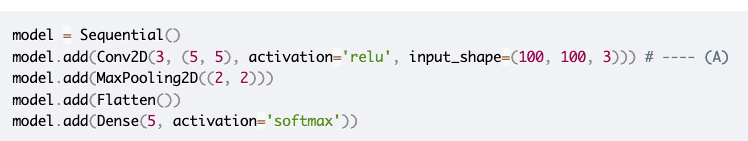

여기서 파라미터 갯수는 몇개일까? 
> 가중치 : 3(필터갯수) x 5 x 5(필터의 크기) x3(채널수)<br/>
편향 : 3(필터갯수) <br/>총 258개


연산되어 나오는 Output, 즉 Feature map 의 크기를 조절하고 실제 이미지 값을 충분히 활용하기 위해 사용됩니다.

#### 스트라이드(Stride)

**<font color="ff6f61">스트라이드(Stride)</font>**는 '보폭'이라는 뜻을 가진 단어입니다.<br/>
Stride 를 조절하면 슬라이딩(Sliding)시에 몇 칸 씩 건너뛸지를 나타냅니다.

위에서 살펴본 것처럼 필터가 한 칸씩 슬라이딩하려면 **`Stride=1`** 로 해주어야 하며<br/>
두 칸씩 슬라이딩하려면 **`Stride=2`** 로 설정해주어야 합니다.

두 가지 경우에 대해 아래 그림을 보며 알아보도록 하겠습니다.

> ❗️ ***아래 그림에서 Stride가 변함에 따라 출력되는 Feature map의 크기가 어떻게 변하는지 주목해봅시다.***

- **Stride = 1**

<img src="https://adeshpande3.github.io/assets/Stride1.png"/>

- **Stride = 2**

<img src="https://adeshpande3.github.io/assets/Stride2.png"/>

- **필터 크기(Filter size), 패딩(Padding), 스트라이드(Stride)에 따른 Feature map 크기 변화**

$$
N_{\text{out}} = \bigg[\frac{N_{\text{in}} + 2p - k}{s}\bigg] + 1
$$

$N_{\text{in}}$ : 입력되는 이미지의 크기(=피처 수) <br/>
$N_{\text{out}}$ : 출력되는 이미지의 크기(=피처 수) <br/>
$k$ : 합성곱에 사용되는 커널(=필터)의 크기 <br/>
$p$ : 합성곱에 적용한 패딩 값 <br/>
$s$ : 합성곱에 적용한 스트라이드 값

### 풀링(Pooling)

가로, 세로 방향의 공간을 줄이기 위한 **<font color="ff6f61">풀링(Pooling)</font>**을 수행합니다.

풀링 방법에는 **최대 풀링(Max pooling)**과 **평균 풀링(Average pooling)**이 있습니다. <br/>
최대 풀링은 정해진 범위 내에서 가장 큰 값을 꺼내오는 방식이며 평균 풀링은 정해진 범위 내에 있는 모든 요소의 평균을 가져오는 방식입니다.<br/>
일반적으로 이미지를 처리할 때에는 각 부분의 특징을 최대로 보존하기 위해서 최대 풀링을 사용합니다.<br/>
아래 그림은 $2×2$ 크기의 최대 풀링과 평균 풀링을 처리하는 과정을 비교하여 나타낸 것입니다.

<img src="https://i.imgur.com/ZuJLMFi.png" height="350">

위 그림에서 왼쪽은 최대 풀링으로 각각의 2×2의 범위 내에서 가장 큰 요소인 100,184,12,45 출력 데이터로 가져옵니다.<br/>
오른쪽은 평균 풀링으로 각각의 2×2의 범위 내 요소의 평균값인 36,80,12,15 를 출력 데이터로 가져옵니다.

풀링 층은 학습해야 할 **가중치가 없으며 채널 수가 변하지 않는다**는 특징을 가지고 있습니다. 
>채널이란 예를들면 흑백은 1, 컬러는 3 이당

### 완전 연결 신경망(Fully Connected Layer)

합성곱 층(Convolutional Layer)와 풀링 층(Pooling Layer)에서 충분히 특징을 추출했다면,<br/>
다음은 분류를 위한 완전 연결 신경망을 구축할 차례입니다.

완전 연결 신경망은 여러분이 이전에 구축했던 다층 퍼셉트론 신경망으로 구성되어 있으며<br/>
풀어야 하는 문제에 따라서 출력층을 잘 설계해주는 것이 중요합니다.

### CNN의 학습

그렇다면 CNN에서는 어떤 부분이 학습될까요?<br/>
영상을 잠깐 멈추고 지금까지 배운 층에서 어떤 부분에 학습되는 가중치가 있었을 지 알아보도록 합시다.

이미 위 내용을 학습하면서 눈치채신 분들도 계시겠지만<br/>
정답은 Convolution 층에 있는 **Filter의 가중치**입니다.

그렇다면 학습된 필터의 모습은 어떻게 생겼을까요?<br/>
아래 그림은 ImageNet 데이터를 학습한 CNN의 첫 번째 Convolution 층의 Filter 가중치를 시각화한 이미지입니다.

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note431/CNN3.png" height = "300"/>

그럼 층이 깊어지면 필터는 어떤 특징을 잡아낼까요?<br/>
Convolution 층과 Pooling 층을 거치면서 이미지가 작아지고 Convolution 층의 Filter는 더 큰 특징을 포착하게 됩니다.

아래는 CNN층이 깊어지면서 필터가 어떤 부분을 학습하게 되는 지를 나타낸 이미지입니다.

<img src="https://i.imgur.com/0mOlT1j.jpg" height="450">

그림을 보면 낮은 층에서는 가로, 세로 등의 특징을 학습함을 볼 수 있고, 층이 깊어지면서 물체의 일부를 포착하게 됩니다.<br/>
그리고 층이 더욱 깊어지게 되면 물체 전체의 윤곽에 해당하는 특징을 학습함을 알 수 있습니다.

### Example

일반적인 이미지를 10개의 클래스로 분류하는 데이터셋인 **Cifar10 데이터셋**을 직접 구축한 CNN을 통해 분류하는 예제를 풀어보도록 하겠습니다. 

> ❓ ***Cifar10 예제는 이진 분류, 다중 분류, 회귀 중 어디에 속할까요? <br/>
<font color="ff6f61">항상 문제를 풀기 전에 자신이 풀고자 하는 문제가 어디에 속하는지 생각</font>해보도록 합시다.***

1. **먼저 필요한 패키지와 라이브러리를 불러옵니다.**

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

2. **시드(Seed)를 고정합니다.**

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

3. **데이터셋을 불러온 후 학습 데이터셋(Train Dataset)과 시험 데이터셋(Test Dataset)으로 나누어(Split)주고 픽셀값을 정규화 하여줍니다.**

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [4]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

4. **이제 본격적으로 신경망 모델을 구축해보겠습니다.**

    3개의 Convolution 층 사이에 Pooling 층을 끼워넣어 특징 추출 부분을 구성하고<br/>
1개의 은닉층과 출력층으로 구성된 완전 연결 신경망으로 분류기를 구축합니다.

    > ❗️ ***아래 주어진 예시 코드 이외에도 층을 추가해보거나 제외해보면서<br/>
모델 구조를 다양하게 바꾸어 성능을 테스트 해봅시다.***

In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu')) #32는 필터의 갯수,필터를 병렬적으로 여러개 사용.
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train,
          batch_size=128,
          validation_data=(X_val, y_val),
          epochs=10)

Epoch 1/10
313/313 [==============================] - 15s 9ms/step - loss: 1.6073 - accuracy: 0.4160 - val_loss: 1.3617 - val_accuracy: 0.5124
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 1.1851 - accuracy: 0.5808 - val_loss: 1.0738 - val_accuracy: 0.6185
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 1.0055 - accuracy: 0.6445 - val_loss: 1.0155 - val_accuracy: 0.6415
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 0.8866 - accuracy: 0.6895 - val_loss: 0.9384 - val_accuracy: 0.6648
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.7974 - accuracy: 0.7196 - val_loss: 0.8695 - val_accuracy: 0.6945
Epoch 6/10
313/313 [==============================] - 2s 7ms/step - loss: 0.7156 - accuracy: 0.7497 - val_loss: 0.8405 - val_accuracy: 0.7115
Epoch 7/10
313/313 [==============================] - 3s 8ms/step - loss: 0.6425 - accuracy: 0.7772 - val_loss: 0.8683 - val_accuracy: 0.7037
Epoch

5. **학습한 신경망 모델을 사용하여 평가합니다.**

In [9]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.8703 - accuracy: 0.7153 - 802ms/epoch - 3ms/step


[0.8703230619430542, 0.7153000235557556]

## 전이학습 (Transfer Learning)


논문 등 여러 학술자료를 검색할 수 있는 [구글 스칼라(Google Scholar)](https://scholar.google.com/)로 가면 다음과 같은 말을 볼 수 있습니다.

<img src="https://i.imgur.com/0AgnMo3.png" height="250"/>


위 페이지에서 볼 수 있는 **"거인의 어깨에 올라서서 더 넓은 세상을 바라보라"**는 말은<br/>
'이미 잘 정립된 지식을 바탕으로 하여 더 높은 곳에 이를 수 있었다'는 뜻을 가지고 있는데요.

이를 신경망 학습에 적용한 것이 바로 **<font color="ff6f61">전이 학습(Transfer Learning)</font>** 입니다.<br/>
일반적으로 전이 학습은 대량의 데이터를 학습한 **사전 학습 모델(Pre-trained Model)**의 가중치를 그대로 가져온 뒤<br/>
분류기, 즉 완전 연결 신경망 부분만 추가로 설계하여 사용합니다.

다음 이미지는 전이 학습을 나타낸 이미지입니다.<br/>
사전 학습 모델(위)을 바탕으로 새로운 모델(아래)을 구축합니다.

<img src="https://i.imgur.com/LT79Yw1.jpg" height="400"/>



사전 학습 모델의 가중치는 대량의 데이터를 학습하여 얻어지는데요.<br/>
여러 데이터의 일반적인 특징을 많이 학습하였기 때문에 어떠한 데이터를 넣더라도 준수한 성능을 보입니다.

일반적으로 사전 학습 가중치는 학습되지 않도록 고정(**`freeze`**)한 채로 진행되기 때문에<br/>
빠르게 좋은 결과를 얻을 수 있다는 장점이 있습니다.

#### 이미지 분류를 위한 주요 사전 학습 모델(Pre-trained Model)

다음으로는 이미지 분류에서 사용되는 주요 사전 학습 모델인 **VGG, Inception, ResNet** 에 대해 알아보도록 하겠습니다.

> ❗️ ***모델의 구조를 모두 외울 필요는 없습니다. 각 모델의 이름 정도만 알고 넘어가도 충분합니다.***

- **VGG**

VGG는 2014년 ILSVRC 에서 우승을 거둔 모델입니다.<br/>
층의 개수에 따라 VGG13, VGG16, VGG19 가 있는데요.<br/>
모든 VGG는 아래와 같은 3가지 특징을 가지고 있습니다.

1. 모든 합성곱 층에서 **3×3 크기의 필터 사용**<br/>
    - 대신 층을 깊게 쌓음으로써 기존 7×7, 11×11 크기의 필터 이상의 표현력을 가질 수 있도록 함<br/> (보통 3x3 을 많이 사용하는데 왜 홀수를 사용할까요?)
    
2. 활성화 함수로 **ReLU를 사용**하고 가중치 초깃값으로는 **He 초기화**을 사용<br/>
    - 층을 깊게 쌓았음에도 기울기 소실(Gradient vanishing)문제기 빌셍하지 않음
3. 마지막으로 완전 연결 층에 드롭아웃(Dropout)을 사용하여 과적합 방지 및 옵티마이저는 아담(Adam)  사용

VGG16의 모델 구조는 아래와 같습니다.

<img src="https://i.imgur.com/2egGDNg.png" height="300"/>

- **GoogLeNet(Inception)**

GoogleNet은 2015년 ILSVRC 에서 우승을 거둔 모델입니다.<br/>
GoogLeNet 역시 기본적인 합성곱 신경망이 결합된 형태를 띠고 있는데요.<br/>
하지만 세로 방향의 깊이 뿐만 아니라 **가로 방향으로도 넓은 신경망 층**을 가지고 있다는 것이 특징입니다.

GoogLeNet의 구조는 아래와 같습니다.


<img src="https://i.imgur.com/zt5ND1y.png" height="300"/>


이렇게 가로 방향으로 층을 넓게 구성한 것을 **인셉션(Inception)** 구조라고 하는데요.<br/>
위와 같은 인셉션 구조를 활용하여 크기가 다른 필터와 풀링을 병렬적으로 적용한 뒤 결과를 조합합니다.

세희의 노트
> 1x1 convolution 이 많이 사용되었는데 이유는? 파라미터를 많이 줄일 수 있기 때문이다. 
conv 층을 지나면 모든 채널이 하나로 합쳐진다. 그리고 필터 갯수만큼 채널이 생기게 된다. 즉, input shape 이 (3,3,160) 이라면 1x1 의 필터가 n개 있다고 할때 conv층을 지난 output 의 shape 은 (3,3,n) 이 된다. 그랬을 때에 같은 height 과 weight 이라도 채널수가 줄면서 파라미터가 줄어들게 된다.

- **ResNet**

ResNet은 2016년 ILSVRC 에서 우승을 거둔 모델입니다.<br/>
먼저 ResNet의 구조를 나타낸 이미지를 살펴보겠습니다. (152층)

<img src="https://i.imgur.com/DWcwuKl.png" height="400"/>



  위 이미지에서 층을 넘어 이어지는 화살표를 볼 수 있는데요.<br/>
  이 화살표는 ResNet의 특징인 **Residual Connection(=Skipped Connection)** 입니다.<br/>
  Residual Connection를 이미지로 나타내면 아래와 같은데요.

<img src="https://i.imgur.com/xdNL4LC.jpg" height="300"/>

층을 거친 데이터의 출력에 거치지 않은 출력을 더해주게 됩니다.<br/>
이 방법을 사용하면 역전파 과정에서 미분을 적용하더라도 1 이상의 값으로 보존되기 때문에<br/>
층이 깊어짐에 따라 발생하는 기울기 소실(Vanishing Gradient) 문제를 어느정도 해결할 수 있습니다.

다음은 이러한 사전 학습 모델을 Keras 코드를 통해 어떻게 적용할 수 있을지에 대해 알아보겠습니다.

보통 50층 까지 사용한다. 이 후에는 bottleneck 이란걸 사용해야함.

#### Example

일반적인 이미지를 10개의 클래스로 분류하는 데이터셋인 **Cifar10 데이터셋**을 VGG를 통해 분류하는 예제를 풀어보도록 하겠습니다. 

1. **먼저 필요한 패키지와 라이브러리를 불러옵니다.**

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

2. **시드(Seed)를 고정합니다.**

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

3. **데이터셋을 불러온 후 학습 데이터셋(Train Dataset)과 시험 데이터셋(Test Dataset)으로 나누어(Split)주고 픽셀값을 정규화 하여줍니다.**

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

4. **사전 학습 모델을 불러옵니다.**

In [15]:
pretrained_model = VGG16(weights='imagenet', include_top=False) #이미지넷 학습한 가중치를 그대로 들고오고, include_top 은 vgg분류할때 사용했던 분류기를 그대로 가지고 올거냐? 해서 false 해주고 필요한 분류기부분을 추가해줌. 특징추출부분만 가져오기!!!!!!

58900480/58889256 [==============================] - 0s 0us/step


5. **사전 학습 모델 위에 완전 연결 신경망을 추가합니다.**

    아래에 추가된 **`GlobalAveragePooling2d()`** 층은<br/>
    데이터 Shape을 **`(None, None, None, 512)`**에서 **`(None, 512)`**로 변화시켜주는 역할을 합니다.

In [16]:
model = Sequential()
model.add(pretrained_model)
model.add(GlobalAveragePooling2D()) #이미지가 2d 라서. flatten 대신에 사용한다. -> mxm 을 1x1 로 바꿔줌 3x3x3 을 1x1x3으로 바꿔줌. (averagepooling 을 채널별로해준다)
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary() #none,none,none,512 ->batchsize,height,width,channel(512) 인데 globalaveragepooling 하면서 height 과 weight 이 1로 변한다. 그래서 none,512로 변함.



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train,
          batch_size=128,
          validation_data=(X_val, y_val),
          epochs=10)

Epoch 1/10
313/313 [==============================] - 23s 64ms/step - loss: 1.9141 - accuracy: 0.2357 - val_loss: 1.7080 - val_accuracy: 0.3077
Epoch 2/10
313/313 [==============================] - 18s 59ms/step - loss: 1.4108 - accuracy: 0.4514 - val_loss: 1.2190 - val_accuracy: 0.5317
Epoch 3/10
313/313 [==============================] - 18s 59ms/step - loss: 1.0752 - accuracy: 0.6096 - val_loss: 0.9632 - val_accuracy: 0.6549
Epoch 4/10
313/313 [==============================] - 19s 60ms/step - loss: 0.8371 - accuracy: 0.7070 - val_loss: 0.8636 - val_accuracy: 0.7051
Epoch 5/10
313/313 [==============================] - 19s 60ms/step - loss: 0.6917 - accuracy: 0.7628 - val_loss: 0.7545 - val_accuracy: 0.7502
Epoch 6/10
313/313 [==============================] - 19s 59ms/step - loss: 0.5748 - accuracy: 0.8081 - val_loss: 0.7165 - val_accuracy: 0.7634
Epoch 7/10
313/313 [==============================] - 19s 59ms/step - loss: 0.4884 - accuracy: 0.8367 - val_loss: 0.8002 - val_accuracy:

5. **학습한 신경망 모델을 사용하여 평가합니다.**

In [20]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 3s - loss: 0.7801 - accuracy: 0.7825 - 3s/epoch - 10ms/step


[0.7801482677459717, 0.7825000286102295]

## 이미지 증강(Image Augmentation)

기본적인 **이미지 증강(Image Augmentation)** 방법에 대해서 알아보겠습니다.<br/>
이미지 증강이란 회전, 반전, 자르기, 밝기 혹은 채도 변화 등을 통해 데이터를 늘리는 방법인데요.

아마 여러분들은 대부분 아래 사진에 있는 동물이 무엇인지 판단하실 수 있을 겁니다.

<img src="https://i.imgur.com/7nP1Kv2.jpg" height="300"/>
<img src="https://i.imgur.com/VQIdbd3.jpg" height="300"/>


하지만 우리가 가지고 있는 데이터셋은 대부분 정면의 고양이 사진을 가지고 학습하게 되는데요.<br/>
그렇기 때문에 우리의 모델은 위와 같이 판단해야 하는 물체가 기울어져 있거나 뒤집어진 이미지에서는 잘 예측하지 못한다는 취약점을 가지고 있습니다.

사람처럼 **일반화(Generalization)**가 잘 되는 모델을 만들기 위해서 학습 데이터셋에 있는 이미지를 일부러 회전하거나 기울여서 나타내는데요.<br/>
이러한 방법을 **<font color="ff6f61">이미지 데이터 증강(Image Data Augmentation)</font>** 이라고 합니다. 

이미지 증강을 사용하면 이미지를 랜덤하게 회전하거나, 늘리고 줄이거나, 확대하거나, 좌우 반전한 이미지 등을 훈련 데이터셋으로 사용할 수 있습니다.<br/>
이를 통해 더욱 **강건(Robust)**한 모델을 만들 수 있습니다.

> ❗️ ***이미지 증강을 위한 코드가 궁금하다면 Reference 자료를 통해 알아보도록 합시다***